# Assignment - Advanced Regression

## Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

# Importing RFE and LinearRegression,Ridge,Lasso

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [3]:
# Changing default display options for better visibility of data
pd.options.display.max_colwidth = 255
pd.options.display.max_rows=225

In [4]:
# Importing dataset

housing_data = pd.read_csv('train.csv')
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Getting details of Data Shape
print(f'\nShape of Data-Frame:\n{housing_data.shape}')


Shape of Data-Frame:
(1460, 81)


In [6]:
#Getting Data Count details
print(f'\nCount of Data-Frame:\n{housing_data.count()}')


Count of Data-Frame:
Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
BsmtCond         1423
BsmtExposure     1422
BsmtFinType1     1423
BsmtFinSF1       1460
BsmtFinType2     1422
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1459
1stFlrSF         1460
2ndFlrSF  

In [7]:
#Getting Columns in Dataframe
print(f'\nColumns in Data-Frame:\n{housing_data.columns}')


Columns in Data-Frame:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       '

In [8]:
#Getting Description
print(f'\nDescription of Data-Frame:\n{housing_data.describe()}')


Description of Data-Frame:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407  

In [9]:
#Checking Null Entry
print(f'\nNull values in Data-Frame:\n{housing_data.isnull().sum()}')


Null values in Data-Frame:
Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndF

### Above Data Analysis Summary:

1. In Data-Frrame, there are 1460 rows and 81 columns.
2. These columns comprises having both "Categorical Value" and "Numeric Value".
3. The dataset look not clean, there are consists of missing values as well.

### Step 2: Cleaning Data:

In [10]:
# If any duplicate values exist in dataset, will drop
housing_data = housing_data.drop_duplicates()

In [11]:
#Re-Checking Data-Frame shape
print(f'\nShape of dataframe:\n{housing_data.shape}')
housing_data.head()


Shape of dataframe:
(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
# Removing Id Column, as it is not require.
housing_data = housing_data.drop(['Id'], axis=1)

In [13]:
# Getting details of Data Shape
print(housing_data.shape)

(1460, 80)


In [14]:
# Removing columns where unique values are 1 as it illustrates that all values are same in column
uniq = housing_data.apply(lambda x:x.nunique())
housing_loan = housing_data.drop(uniq[uniq < 2].index, axis = 1)

In [15]:
#Checking Null Entry
print(((housing_data.isnull().sum()/housing_data.shape[0])*100).round(2))

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

In [16]:
# Columns which are having more than 15 % missing values are drop
housing_data = housing_data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage'], axis=1)
print(((housing_data.isnull().sum()/housing_data.shape[0])*100).round(2))

MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBa

In [17]:
# Analysing columns which still have NaN values
print(housing_data['MasVnrType'].describe(), end='\n\n')
print(housing_data['MasVnrArea'].describe(), end='\n\n')
print(housing_data['BsmtQual'].describe(), end='\n\n')
print(housing_data['BsmtCond'].describe(), end='\n\n')
print(housing_data['BsmtExposure'].describe(), end='\n\n')
print(housing_data['BsmtFinType1'].describe(), end='\n\n')
print(housing_data['BsmtFinType2'].describe(), end='\n\n')
print(housing_data['Electrical'].describe(), end='\n\n')
print(housing_data['GarageType'].describe(), end='\n\n')
print(housing_data['GarageYrBlt'].describe(), end='\n\n')
print(housing_data['GarageFinish'].describe(), end='\n\n')
print(housing_data['GarageQual'].describe(), end='\n\n')
print(housing_data['GarageCond'].describe(), end='\n\n')

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object

count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object

count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

count    1379.000000
mean     1978.50616

In [18]:
# As we have sufficient data for analysis, therefore will dropping rows for the NaN values.
housing_data = housing_data.dropna(axis='rows')

In [19]:
# Re-checking Shape & Missing values per column
print(housing_data.shape)
print(((housing_data.isnull().sum()/housing_data.shape[0])*100).round(2))

(1338, 74)
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
Ha

In [20]:
# Converting dates (YearBuilt, YearRemodAdd, GarageYrBlt) to (DiffYearBuilt, DiffYearRemodAdd, DiffGarageYrBlt)
housing_data['DiffYearBuilt'] = pd.datetime.now().year - housing_data['YearBuilt']
housing_data['DiffYearRemodAdd'] = pd.datetime.now().year - housing_data['YearRemodAdd']
housing_data['DiffGarageYrBlt'] = pd.datetime.now().year - housing_data['GarageYrBlt']

In [21]:
# Isolating Numerical and Categorical column to analysis separately.

# Outcome Column:
outcome_col = 'SalePrice'

# Numerical Columns details: 
numerical_col = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
           'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'DiffYearBuilt', 'DiffYearRemodAdd',
           'DiffGarageYrBlt']
print(len(numerical_col))

# Categorical Columns details: 
categorical_col = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
           'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
           'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
           'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
           'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 
           'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
print(len(categorical_col))

30
43


In [22]:
# Defining columns for each Categorical columns to address issues, if any exist
for col in categorical_col:
    print(col,' : ',housing_data[col].unique())

MSSubClass  :  [ 60  20  70  50 190  45 120  30  85  90  80 160  75 180  40]
MSZoning  :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street  :  ['Pave' 'Grvl']
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  :  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities  :  ['AllPub' 'NoSeWa']
LotConfig  :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  :  ['Gtl' 'Mod' 'Sev']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'Edwards' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1  :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2  :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType  :  ['1Fam' '2fmCon' 'TwnhsE' 'Duplex' 'Twnhs']
HouseStyle  :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual  :  [ 7  6  8  5  9  4 10  3  2]
OverallCond  :  [5 8 6 7 4 3 9 2]
R

### As per above information
- Overall 74 columns, which will comprises of both "Categorical Value and "Numeric Value".
- There are 43 Categorical columns, 30 Numeric columns and One Outcome column

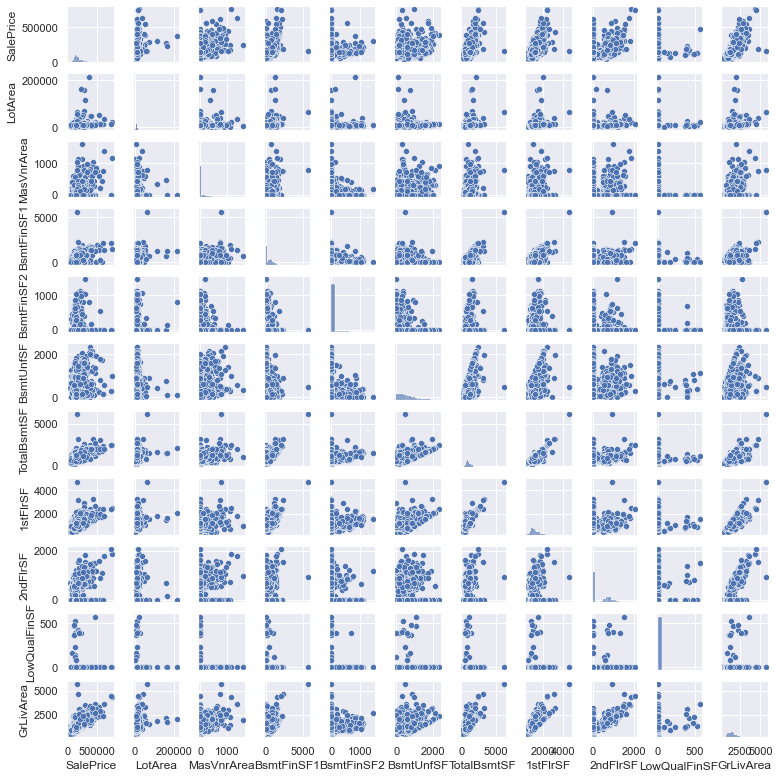

In [23]:
# Let's analysis first 10 Numerical column with "SalePrice"
sns.set()
cols = ['SalePrice', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']
sns.pairplot(housing_data[cols], size = 1.0)
plt.show();

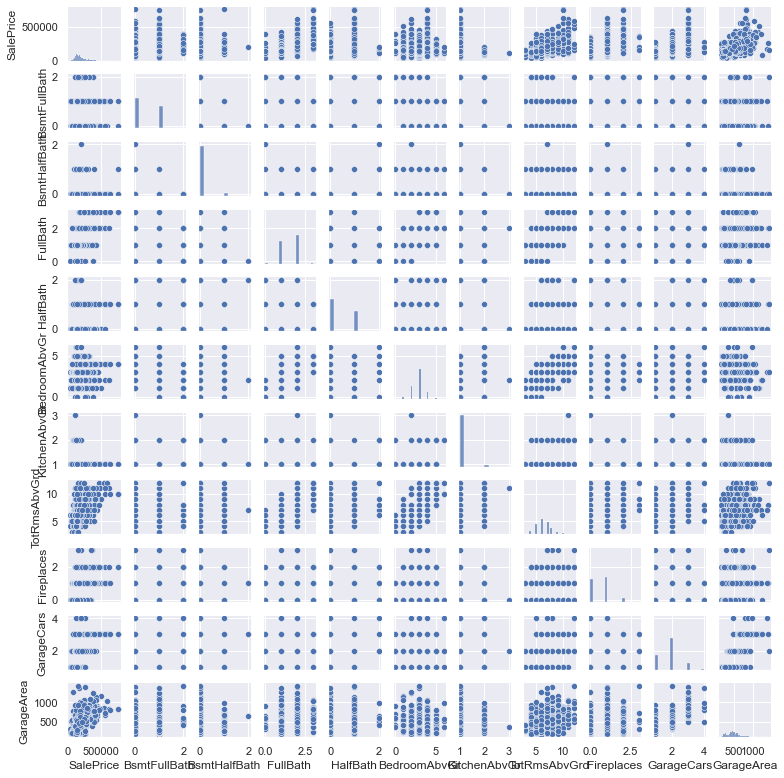

In [24]:
# Let's analysis second 10 Numerical column with "SalePrice"
sns.set()
cols = ['SalePrice', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea']
sns.pairplot(housing_data[cols], size = 1.0)
plt.show();

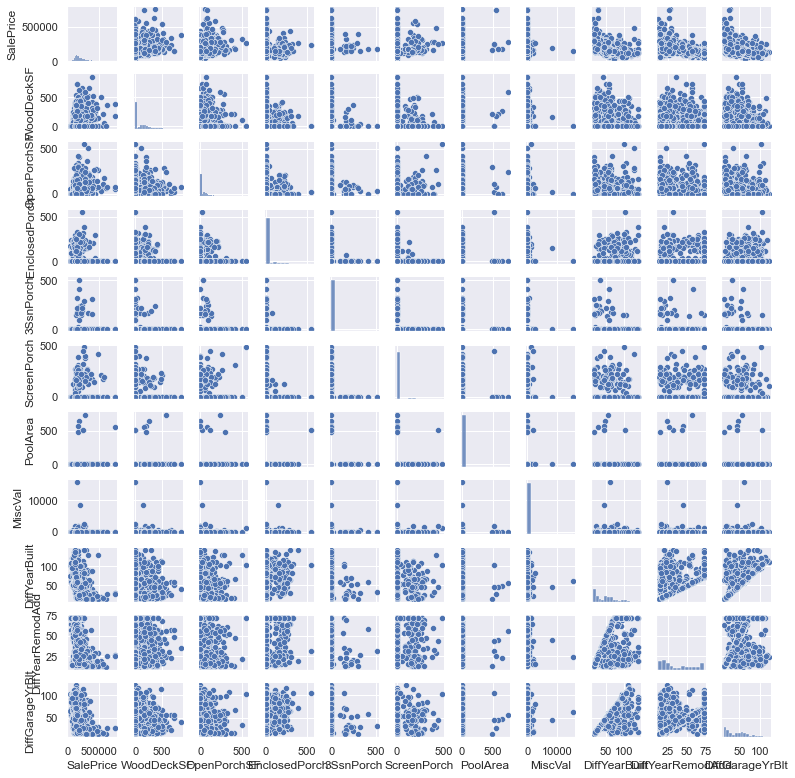

In [25]:
# Let's analysis Third 10 Numerical column with "SalePrice"
sns.set()
cols = ['SalePrice', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'DiffYearBuilt', 'DiffYearRemodAdd',
           'DiffGarageYrBlt']
sns.pairplot(housing_data[cols], size = 1.0)
plt.show();

In [26]:
# Analysing for the Categorical column
def categorical_col_analysis(i, col_i,col_j):
    plt.figure(i)
    variables = housing_data[[col_i]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    my_order = housing_data[[col_i,col_j]].groupby(by=[col_i])[col_j].median().sort_values(ascending=True)
    sns.boxplot(x=col_i, y=col_j, data=housing_data[[col_i,col_j]], order=my_order.index)

<Figure size 432x288 with 0 Axes>

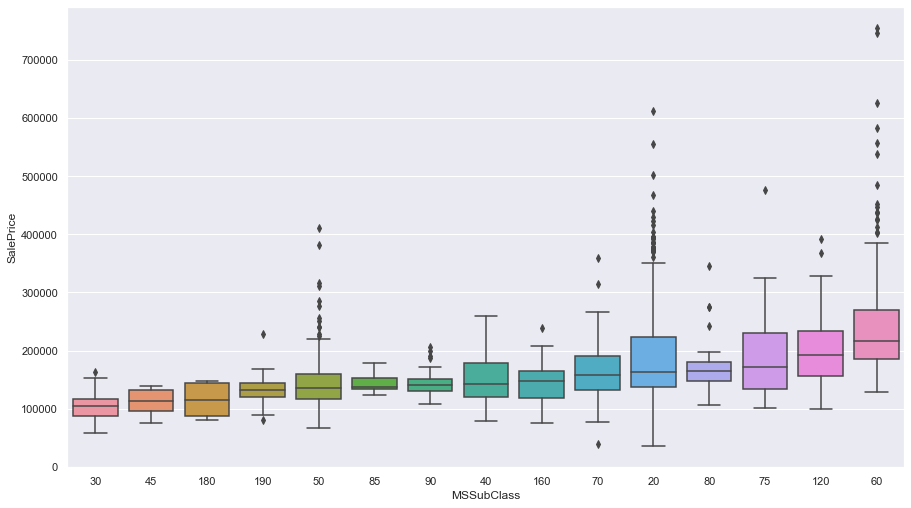

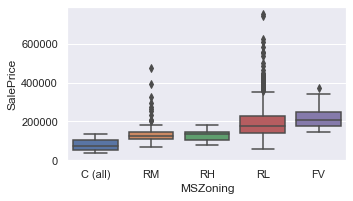

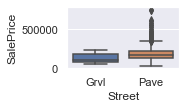

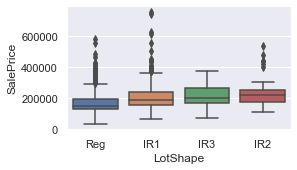

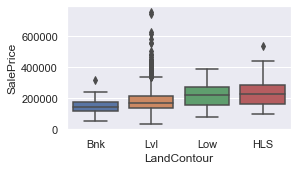

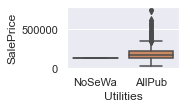

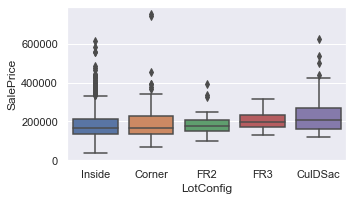

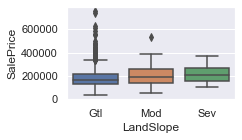

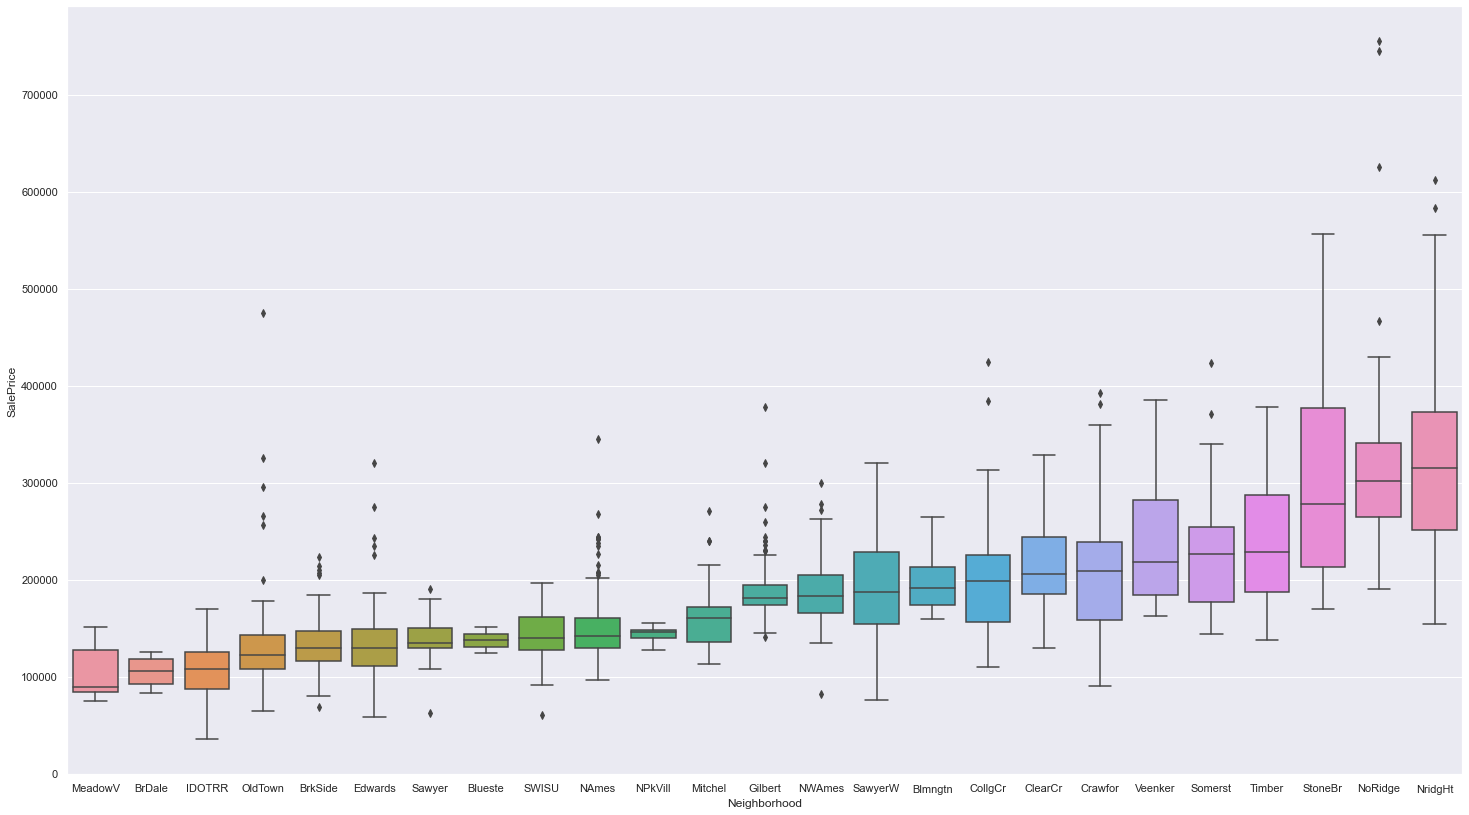

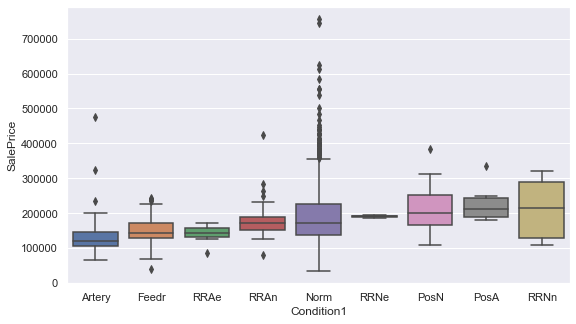

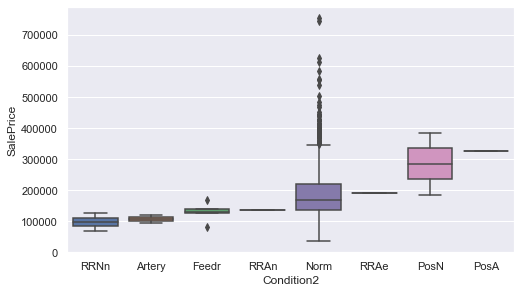

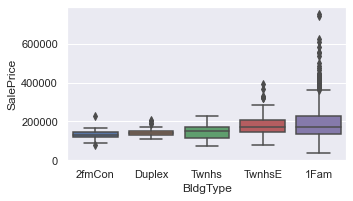

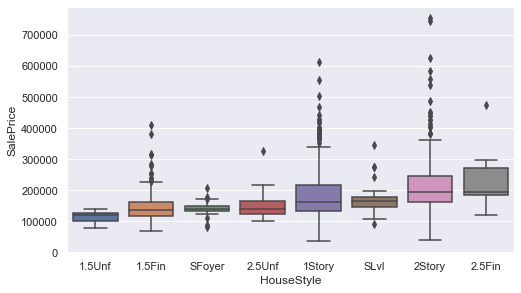

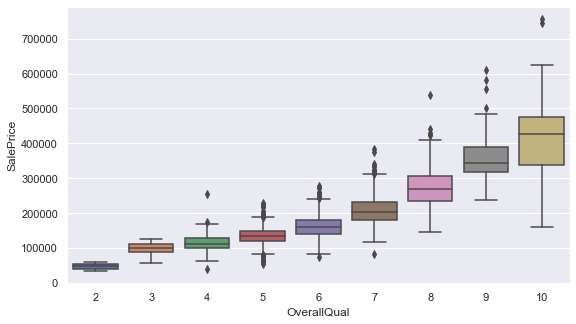

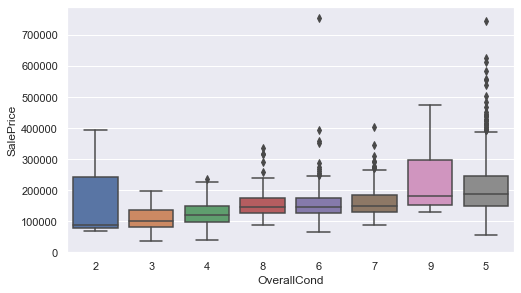

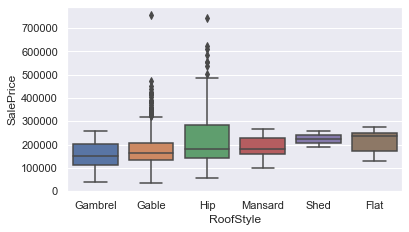

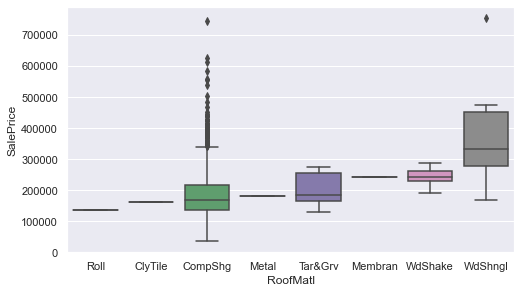

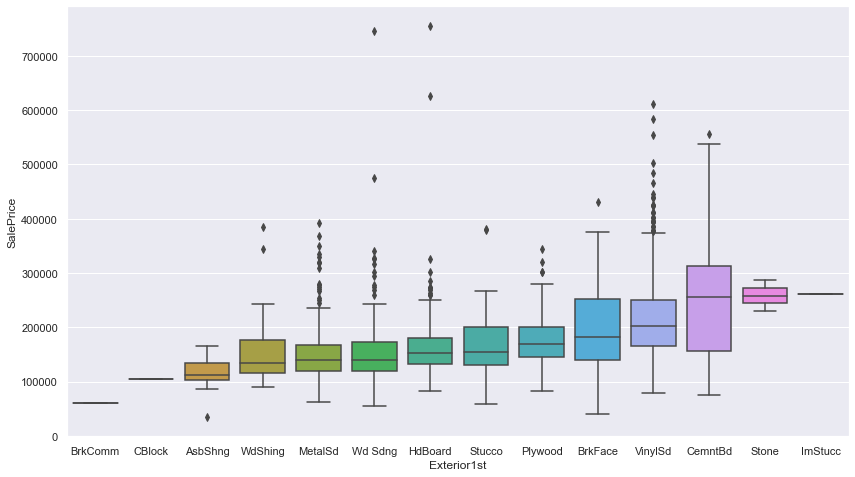

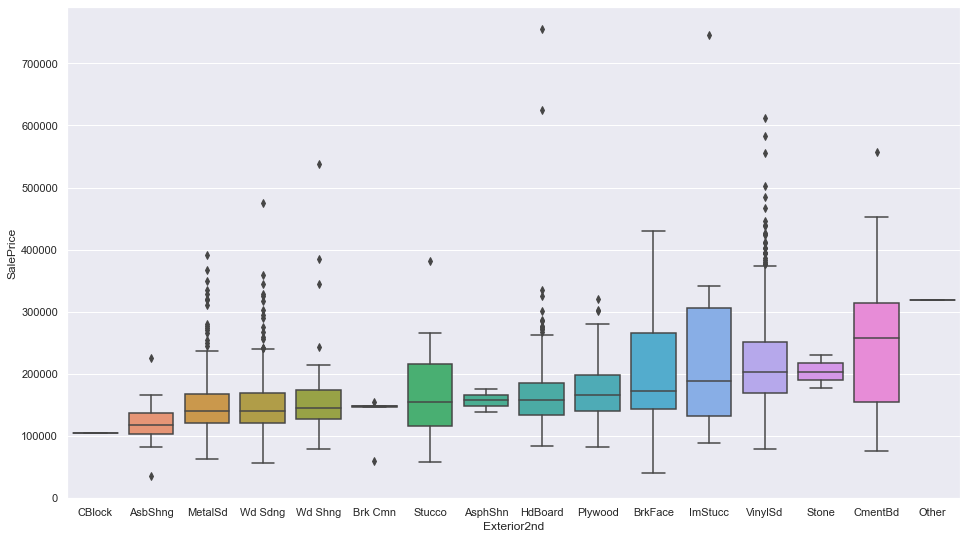

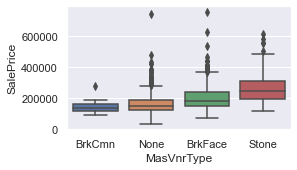

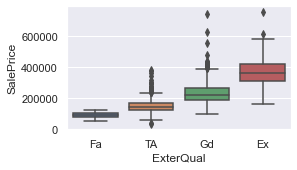

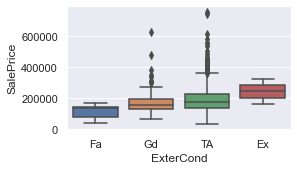

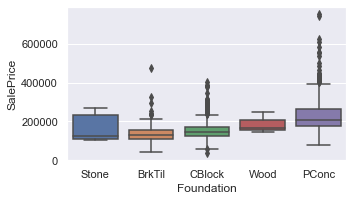

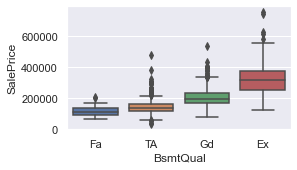

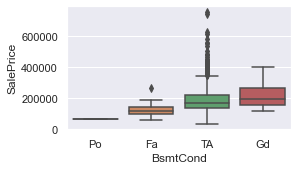

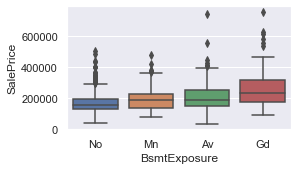

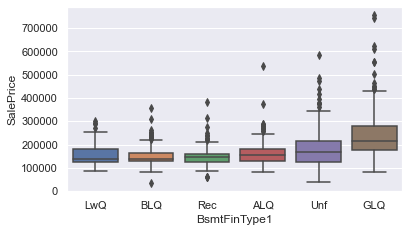

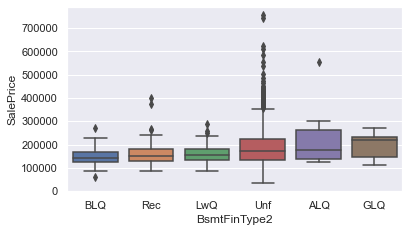

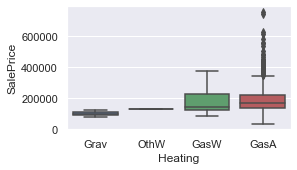

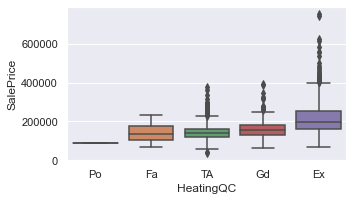

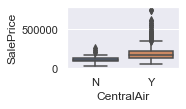

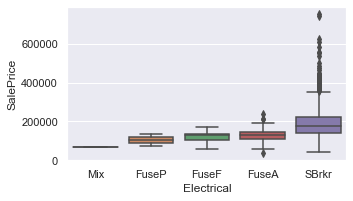

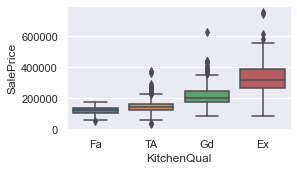

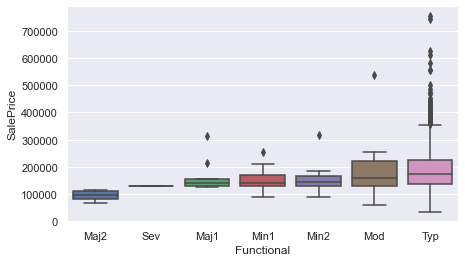

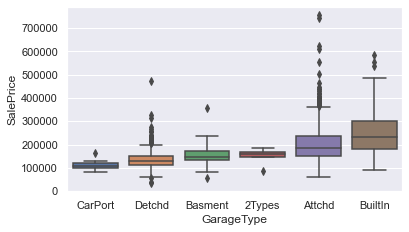

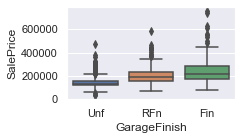

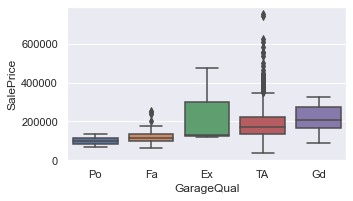

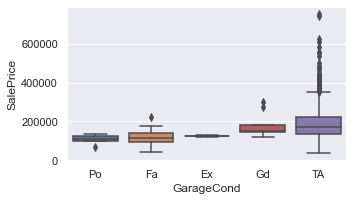

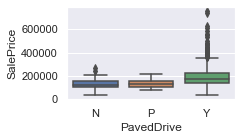

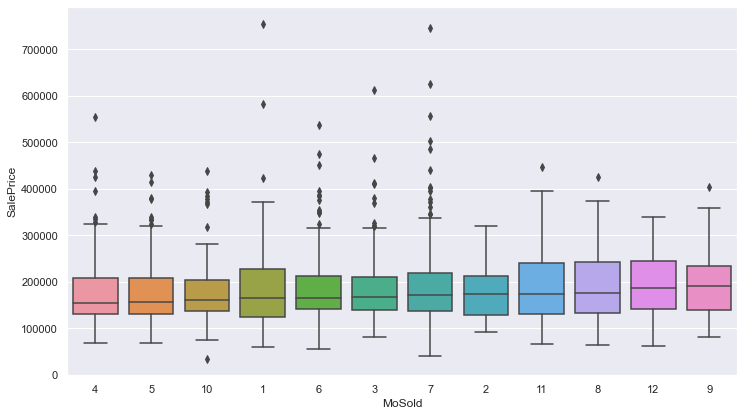

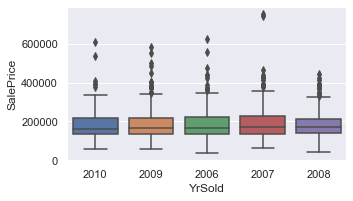

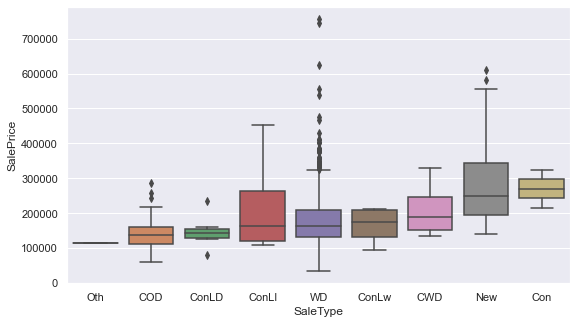

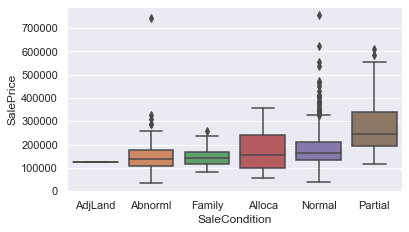

In [27]:
for i, col in enumerate(categorical_col):
    categorical_col_analysis(i, col, outcome_col)

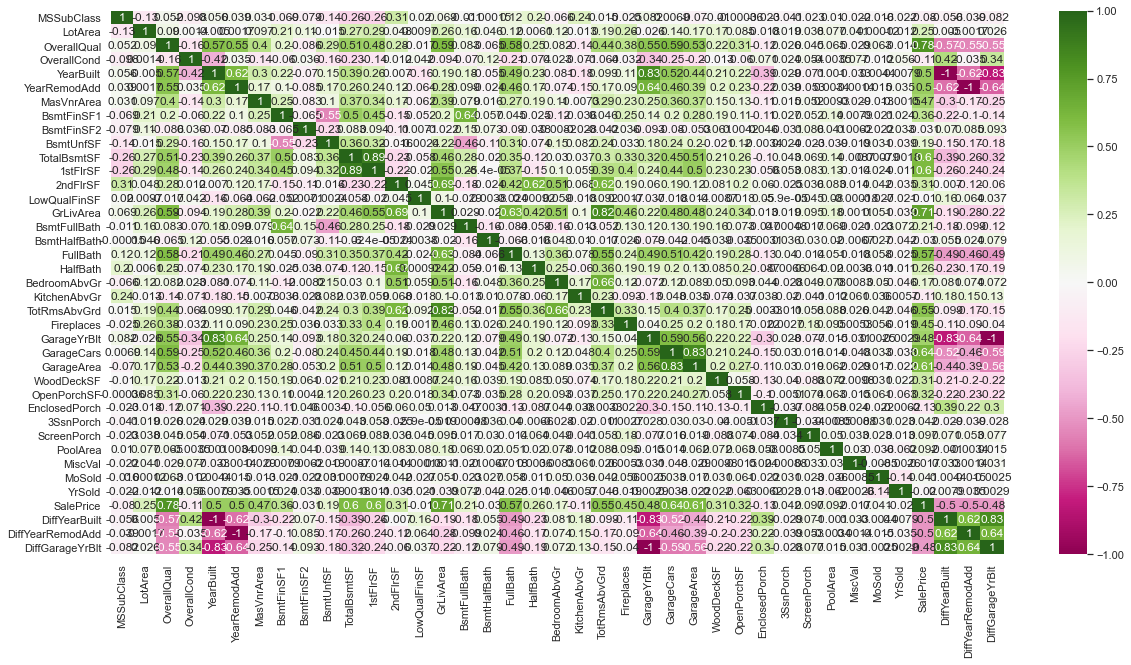

In [28]:
# Correlations heatmap

# figure size
plt.figure(figsize=(20,10))

# heatmap
sns.heatmap(housing_data.corr(), cmap="PiYG", annot=True)
plt.show()

#### Notes:

- Above plots shows that, there is a linear relationship between various columns and output column.
- As per heatmap there are collinearity in data. 

### Step3: Creating Dummy Categorical Fields

In [29]:
# Generating Dummy for all columns using loop.
for col in categorical_col:
    # Dropping the first column from dummy [housing_data] using 'drop_first = True' to avoid multicollinear.
    dummy = pd.get_dummies(housing_data[col], drop_first = True)
    # Creating prefix on dummy column names, so it's easy to identify
    dummy = dummy.add_prefix(f'{col}_')
    # Concatinate the dummy values with original Data-Frame.
    housing_data = pd.concat([housing_data, dummy], axis = 1)
    # Now, we have dummy variables, will drop original categorical column.
    housing_data = housing_data.drop([col], axis = 1)

In [30]:
housing_data.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,2003,2003,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
1,9600,1976,1976,0.0,978,0,284,1262,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,11250,2001,2002,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0
3,9550,1915,1970,0.0,216,0,540,756,961,756,...,0,0,0,0,1,0,0,0,0,0
4,14260,2000,2000,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0


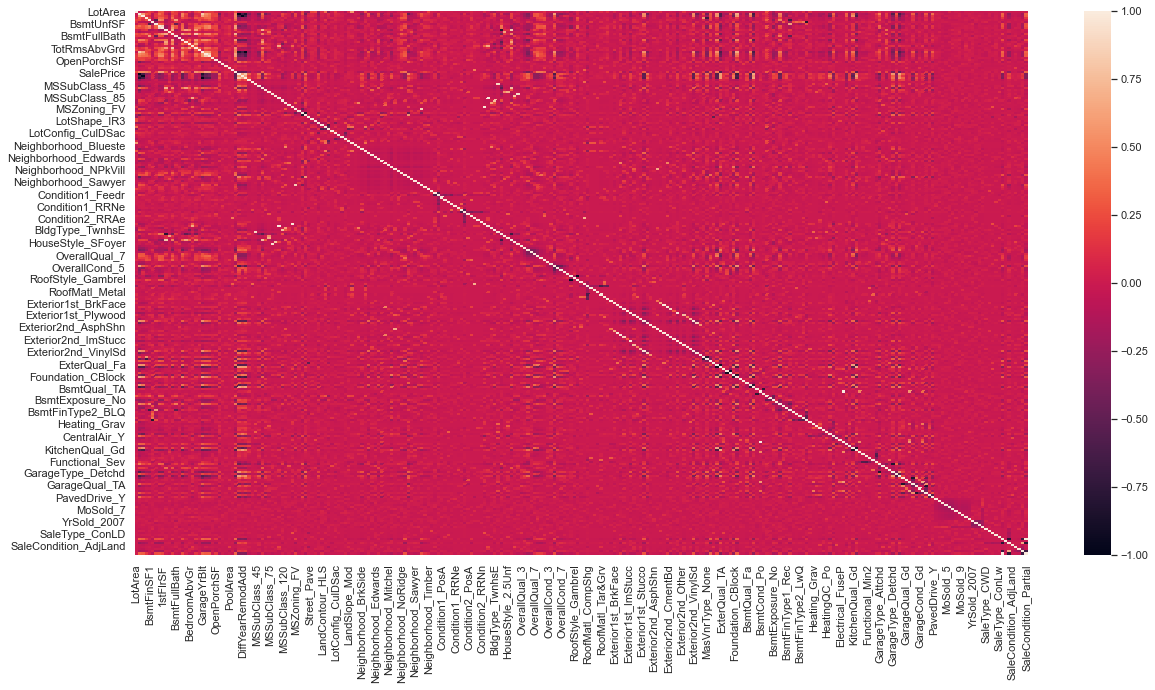

In [31]:
# Generrating correlations on a heatmap after Dummy variables

plt.figure(figsize=(20,10))
sns.heatmap(housing_data.corr(), annot=False)
plt.show()

#### Note:

The heatmap have a lot of collinearity in data, therefore we need to perform feature selection.

### Step 4: Data Preperation

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

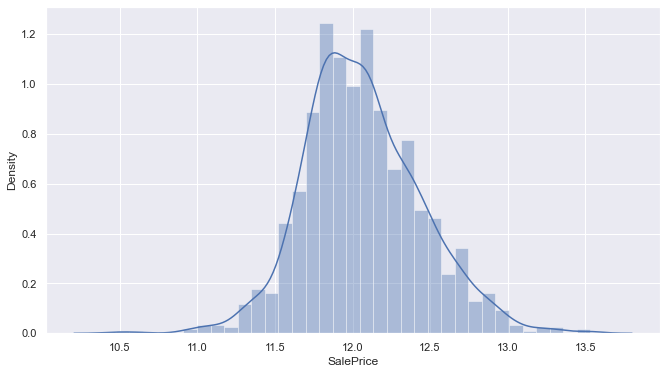

In [32]:
plt.figure(figsize=(11,6))
sns.distplot(np.log(housing_data["SalePrice"]))

In [33]:
housing_data.shape

(1338, 269)

In [34]:
# Generating Train & Test Set
# We specify this so that the train and test data set always have the same rows, respectively
# Preparing Test and Train Set

y = housing_data.loc[:, outcome_col]
X = housing_data.loc[:, housing_data.columns != outcome_col]

scaler = StandardScaler()
scaler.fit(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [35]:
#Checking X Shape for train & Test
print(X_train.shape)
print(X_test.shape)

(936, 268)
(402, 268)


In [36]:
#Creating Simple Linear Regression

lm = LinearRegression()
lm.fit(X_train, y_train)

# Predicting Train Data

y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

# Predicting Test Data

y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9557403099880417
0.3449859142866527


In [37]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_test_pred))
print(rss)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)
rmse = mse**0.5
print(rmse)

1136260355083.9968
2826518296.228848
53165.01007456735


In [38]:
# Model Parameters of SLR

model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-472348.69, 'constant'),
 (110190.431, 'RoofStyle_Shed'),
 (-101367.08, 'Condition2_RRAe'),
 (87741.53, 'OverallQual_10'),
 (62912.225, 'RoofMatl_Membran'),
 (57335.048, 'OverallCond_9'),
 (-56849.818, 'LandSlope_Sev'),
 (-56401.734, 'Functional_Sev'),
 (49007.33, 'OverallQual_9'),
 (-48201.626, 'Condition2_PosN'),
 (47639.277, 'RoofMatl_Metal'),
 (-47443.481, 'RoofMatl_WdShake'),
 (-46382.615, 'Electrical_FuseP'),
 (46333.08, 'OverallCond_8'),
 (43896.235, 'OverallCond_7'),
 (-37630.953, 'RoofMatl_CompShg'),
 (-37168.112, 'Exterior2nd_CmentBd'),
 (-36085.911, 'Functional_Maj2'),
 (-34741.431, 'GarageQual_Fa'),
 (33516.214, 'Condition2_RRNn'),
 (33128.196, 'OverallCond_6'),
 (30452.236, 'Exterior1st_CemntBd'),
 (-30076.821, 'GarageQual_Po'),
 (-29100.917, 'Condition1_RRNe'),
 (-28945.722, 'MSSubClass_180'),
 (-28514.036, 'Exterior1st_Stone'),
 (-28512.08, 'GarageQual_TA'),
 (28033.421, 'Condition2_RRAn'),
 (27903.87, 'OverallCond_5'),
 (-27099.229, 'Foundation_Wood'),
 (-26846.302, '

#### Note:

- As per above model Simple Linear Regression gave us a complex model and most of the coefficients as non-zero values.
- We can conclude that Simple Linear Regression has not useful for the feature selection.

### Redge Regression

In [39]:
# List of Alphas to Tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [40]:
# Defined Param_Alpha value Less than Equal to 100
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007257,0.000773,0.002871,0.000166,0.0001,{'alpha': 0.0001},-19815.850478,-19161.644336,-15499.551311,-18913.400285,...,-18613.336934,1591.360297,25,-11263.615435,-11301.510908,-12039.829984,-11716.008888,-11399.800404,-11544.153124,294.497640
1,0.005732,0.000078,0.002415,0.000022,0.001,{'alpha': 0.001},-19809.117292,-19159.801904,-15495.284338,-18898.067973,...,-18604.738256,1589.336109,24,-11264.619978,-11303.927873,-12041.524298,-11717.231361,-11400.156345,-11545.491971,294.586904
2,0.006303,0.000606,0.002708,0.000329,0.01,{'alpha': 0.01},-19753.109946,-19118.995848,-15460.981834,-18777.359264,...,-18529.007763,1570.488660,23,-11274.453617,-11326.949754,-12056.149452,-11727.954811,-11405.488730,-11558.199273,294.645472
3,0.005649,0.000180,0.002455,0.000118,0.05,{'alpha': 0.05},-19543.327757,-18751.092294,-15492.396315,-18515.925946,...,-18292.618092,1443.505255,22,-11317.373485,-11412.592643,-12109.753172,-11773.575048,-11434.621034,-11609.583076,293.893479
4,0.005626,0.000124,0.002522,0.000211,0.1,{'alpha': 0.1},-19300.518786,-18407.659029,-15548.876678,-18349.809222,...,-18096.907469,1319.944146,20,-11356.876742,-11490.575312,-12156.074291,-11814.877860,-11461.099055,-11655.900652,293.306273


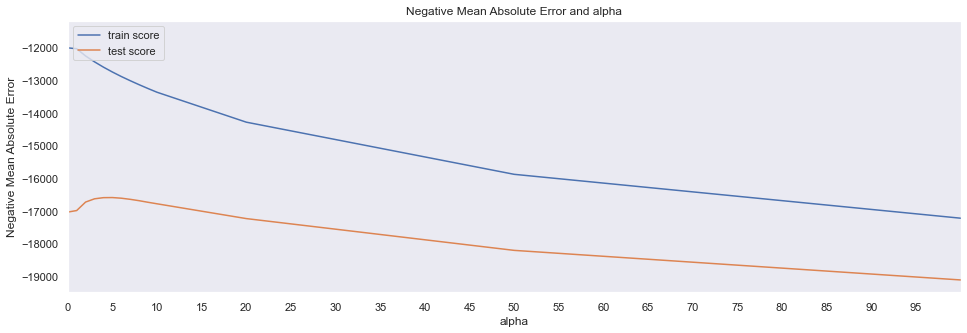

In [41]:
# Plotting Mean Test and Train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [42]:
# Printing the Best Alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [43]:
# Checking Ridge with Alpha value 5
alpha = 5
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9494736963448017
0.3615483776299585


In [44]:
# Ridge-Model parameters

model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-455892.533, 'constant'),
 (41784.711, 'OverallQual_10'),
 (23780.816, 'OverallQual_9'),
 (19974.459, 'Neighborhood_StoneBr'),
 (-17565.295, 'BsmtQual_Gd'),
 (-17454.526, 'KitchenQual_Gd'),
 (17086.995, 'Neighborhood_NoRidge'),
 (16877.884, 'RoofMatl_WdShngl'),
 (16577.924, 'Functional_Typ'),
 (16500.928, 'OverallCond_9'),
 (-16445.851, 'KitchenAbvGr'),
 (-15870.716, 'KitchenQual_TA'),
 (-15339.391, 'OverallQual_6'),
 (15062.378, 'BsmtExposure_Gd'),
 (-14480.98, 'OverallCond_4'),
 (13968.378, 'Neighborhood_Crawfor'),
 (-13684.501, 'OverallQual_5'),
 (-13107.325, 'OverallCond_3'),
 (-12859.578, 'OverallQual_4'),
 (12642.066, 'MasVnrType_Stone'),
 (-12239.635, 'BsmtQual_TA'),
 (-12125.147, 'RoofMatl_CompShg'),
 (12100.559, 'SaleCondition_Partial'),
 (-12099.372, 'Neighborhood_NWAmes'),
 (-11789.753, 'OverallQual_7'),
 (-11082.427, 'Neighborhood_SWISU'),
 (-11064.779, 'Condition1_RRAe'),
 (10061.293, 'OverallCond_7'),
 (-10019.837, 'ExterQual_TA'),
 (-9812.486, 'Neighborhood_Timber'),
 

#### Note:

- As per above information, Ridge regression provide a complex model with some of the coefficients as non-zero values. However, there is a huge difference between Train (0.94) and Test data (0.36).
- We can say that Ridge regression has not helped us in the feature selection.

In [45]:
#Predicting the R-squared value 
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9494736963448017


In [46]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.3615483776299585


In [47]:
# Printing the RMSE value
mean_squared_error(y_test, y_test_pred)

2755047916.138486

### Lasso Regression

In [48]:
#Lasso Regression

lasso = Lasso()

# Cross Validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [49]:
# Assigning Lasso validation into cv_results_1
cv_results_1 = pd.DataFrame(lasso_cv.cv_results_)

In [50]:
# Printing the Best Alpha
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 100}
-16442.80222527531


In [51]:
# Lasso model
alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [52]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9442536983496376


In [53]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.3520230624968489


In [54]:
mean_squared_error(y_test, y_test_pred)

2796151578.011282

In [55]:
lasso.coef_

array([ 6.25190219e-01,  8.97991985e+02,  1.98298789e+02,  2.14238185e+01,
        3.21407217e+01,  2.41274848e+01,  1.74384391e+01,  1.71917669e+01,
        4.63272623e+01,  6.66550804e+01,  3.27480324e+01,  1.10892314e+01,
       -3.70618826e+02,  0.00000000e+00,  0.00000000e+00,  9.73426865e+01,
       -5.39410240e+03, -2.34330929e+04,  6.98062512e+02,  3.62456139e+03,
       -1.58586973e+01,  3.58761137e+03,  1.06281063e+01,  1.05698061e+01,
        1.07639311e+01,  1.69900436e+01,  4.13143320e+01,  5.54508530e+01,
        8.25119981e+01, -4.64411770e+00,  4.50090905e+02,  0.00000000e+00,
       -9.49559370e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.36517976e+03,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -6.30718872e+03, -1.54722255e+03,
       -5.47583863e+03, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.59800174e+03, -4.50470937e+02,  0.00000000e+00,
        0.00000000e+00,  

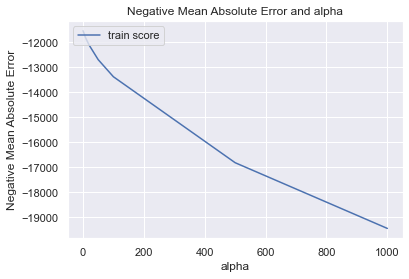

In [56]:
# Plotting mean Test and Train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting
plt.plot(cv_results_1['param_alpha'], cv_results_1['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [57]:
# Double the Alpha value to 10 from 5.0 for Ridge model
ridge = Ridge(alpha = 10.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.945507659537971
0.34147450827520953


In [58]:
# Double the Alpha value to 200 from 100 for Lasso model
alpha = 200

lasso = Lasso(alpha=alpha)       
lasso.fit(X_train, y_train)

#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

mean_squared_error(y_test, y_test_pred)

lasso.coef_

0.9362924628581739
0.2953750582393161


array([ 6.46606183e-01,  7.50678157e+02,  2.80906191e+02,  2.36617106e+01,
        3.40930116e+01,  2.33486484e+01,  1.97936701e+01,  2.05422151e+01,
        4.62841482e+01,  6.64116119e+01,  3.57574357e+01,  1.18089742e+01,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -5.86623995e+03, -2.21795106e+04,  4.44074400e+02,  3.92676501e+03,
        0.00000000e+00,  1.72839481e+03,  1.79863209e+01,  1.15383388e+01,
        1.28183362e+01,  1.87245345e+01,  3.86788867e+01,  5.98941561e+01,
        8.00169873e+01, -5.36027522e+00,  2.97043901e+02, -0.00000000e+00,
        2.26886680e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -5.41338782e+03, -0.00000000e+00,
       -4.06772331e+03, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  2.06898267e+03, -1.57289995e+03,  0.00000000e+00,
        0.00000000e+00, -

In [59]:
#Perform Model Parameter
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [60]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
123,OverallCond_3,31688.754151
122,OverallQual_10,20425.660549
87,Neighborhood_Timber,16436.986851
223,GarageType_Attchd,14853.734733
190,BsmtExposure_Mn,14326.396718
80,Neighborhood_NridgHt,14081.320465
130,RoofStyle_Gable,12932.772293
142,Exterior1st_BrkComm,12917.977549
71,Neighborhood_Edwards,12217.542585
173,ExterQual_Fa,9420.192716


In [61]:
lasso = Lasso(alpha=100)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9442536983496376
0.3520230624968489


### Conclude:
- Best alpha value for Lasso : {'alpha': 100}
- Best alpha value for Ridge : {'alpha': 5.0}

Here is the conclusion that, after compairing both the model we can say that the below features are best explaining the DataSet.
- OverallCond_3
- OverallQual_10
- Neighborhood_Timber
- GarageType_Attchd
- BsmtExposure_Mn
- Neighborhood_NridgHt
- RoofStyle_Gable
- Exterior1st_BrkComm
- Neighborhood_Edwards
- ExterQual_Fa

### Let's drop the top 5 variables and rebuild lasso

Top 5 features are: OverallCond_3, OverallQual_10, Neighborhood_Timber, GarageType_Attchd & BsmtExposure_Mn 

In [62]:
# Drop 5 features for Train set
X_train_new = X_train.drop(['OverallCond_3', 'OverallQual_10', 'Neighborhood_Timber', 'GarageType_Attchd'
                               , 'BsmtExposure_Mn'], axis=1)

In [63]:
X_test_new = X_test.drop(['OverallCond_3', 'OverallQual_10', 'Neighborhood_Timber', 'GarageType_Attchd'
                               , 'BsmtExposure_Mn'], axis=1)

In [64]:
#Lasso Regression post top 5 features.
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [65]:
# Let's check the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [66]:
# Now fit the Ridge model with alpha = 50 and getting coefficients which have been penalised

alpha =50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=50)

In [67]:
lasso.coef_

array([ 5.84089395e-01,  8.82274997e+02,  2.27101031e+02,  2.16593562e+01,
        3.33387457e+01,  2.65465220e+01,  1.74823889e+01,  1.66379407e+01,
        4.78458311e+01,  6.95836025e+01,  3.83649143e+01,  1.11561402e+01,
       -1.54102522e+03,  1.97193641e+02,  2.28551778e+03,  1.99855910e+03,
       -5.44705682e+03, -2.56721189e+04,  5.94713360e+02,  3.43928657e+03,
       -2.42155000e+02,  3.85269969e+03,  8.45265308e+00,  9.95735876e+00,
        1.03390852e+01,  1.41662653e+01,  3.75263887e+01,  4.94375221e+01,
        9.24503371e+01, -4.33447608e+00,  4.59590880e+02,  7.64951744e+01,
       -2.24585933e+02, -0.00000000e+00,  0.00000000e+00,  1.86216190e+03,
       -6.04864427e+03, -0.00000000e+00,  2.64403415e+02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -6.69778383e+03, -5.46444928e+03,
       -8.29481128e+03, -0.00000000e+00, -1.12309386e+03,  1.82255275e+03,
        0.00000000e+00,  6.14398120e+03, -0.00000000e+00,  4.90057191e+03,
        0.00000000e+00,  

In [68]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.9459552673830133
0.3750580604350775


<b>After dropping the top 5 features model there is no major change in r2 score. 94.59% for Train and 37.50% for Test.</b>